# Data pre-processing

In [ ]:
#Importing required libraries for data pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Dataset Exploration

In [ ]:
dataset.head()

,Review,Liked,Age,Gender
0,Wow... Loved this place.,1,39,M
1,Crust is not good.,0,28,M
2,Not tasty and the texture was just nasty.,0,28,F
3,Stopped by during the late May bank holiday of...,1,32,M
4,The selection on the menu was great and so wer...,1,59,M


In [ ]:
dataset.shape

(1000, 4)

In [ ]:
dataset.columns

Index(['Review', 'Liked', 'Age', 'Gender'], dtype='object')

In [ ]:
# checking details about the dataset (mainly checking non-null values)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Age     1000 non-null   int64 
 3   Gender  1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [ ]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Review', 'Gender'], dtype='object')

In [ ]:
# columns with numerical values
dataset.select_dtypes(include=['int64']).columns

Index(['Liked', 'Age'], dtype='object')

In [ ]:
# statistical summary
dataset.describe()

,Liked,Age
count,1000.00000,1000.000000
mean,0.50000,38.833000
std,0.50025,12.113127
min,0.00000,18.000000
25%,0.00000,28.000000
50%,0.50000,38.000000
75%,1.00000,49.000000
max,1.00000,60.000000


Checking number of positive and negative reviews

In [ ]:
# Positive reviews
(dataset.Liked == 1).sum()

500

In [ ]:
# Negative reviews
(dataset.Liked == 0).sum()

500

Checking Length of Reviews

In [ ]:
dataset['length'] = dataset['Review'].apply(len)
dataset.head()

,Review,Liked,Age,Gender,length
0,Wow... Loved this place.,1,39,M,24
1,Crust is not good.,0,28,M,18
2,Not tasty and the texture was just nasty.,0,28,F,41
3,Stopped by during the late May bank holiday of...,1,32,M,87
4,The selection on the menu was great and so wer...,1,59,M,59


<Axes: ylabel='Frequency'>

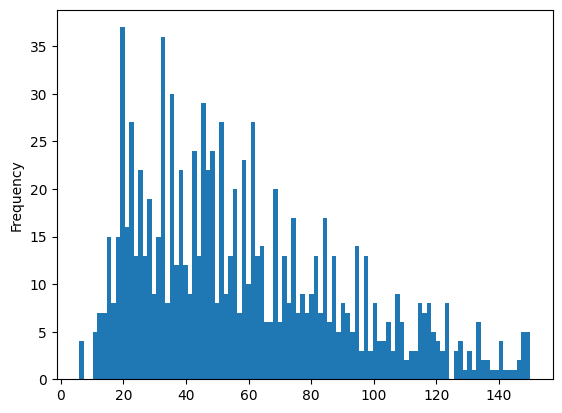

In [ ]:
# plot histogram
dataset['length'].plot(bins=100, kind='hist')

In [ ]:
dataset.length.describe()

count    1000.000000
mean       58.809000
std        32.907255
min         6.000000
25%        33.000000
50%        52.000000
75%        80.000000
max       150.000000
Name: length, dtype: float64

<Axes: ylabel='Frequency'>

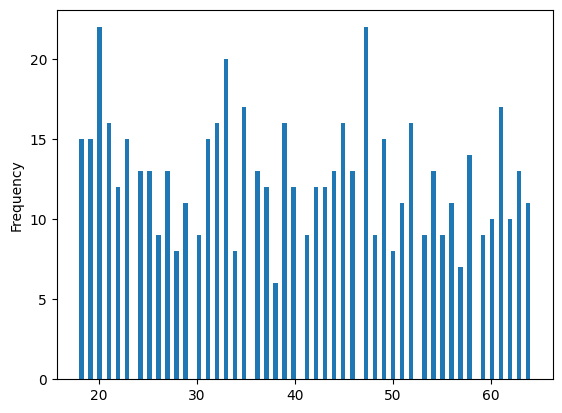

In [ ]:
dataset = dataset.drop(dataset[(dataset['length'] < 18) | (dataset['length'] > 64)].index)
dataset = dataset.reset_index(drop=True)
# plot histogram
dataset['length'].plot(bins=100, kind='hist')

In [ ]:
#Removing and rechecking if length has been removed
dataset = dataset.drop(columns='length')
dataset.head()

,Review,Liked,Age,Gender
0,Wow... Loved this place.,1,39,M
1,Crust is not good.,0,28,M
2,Not tasty and the texture was just nasty.,0,28,F
3,The selection on the menu was great and so wer...,1,59,M
4,Now I am getting angry and I want my damn pho.,0,52,M


In [ ]:
dataset.shape

(595, 4)

# Dealing with Dataset Problems

In [ ]:
# check if there are any null values
if dataset.isnull().values.any()==True:
  # check how many null values
  dataset.isnull().values.sum()
else:
  print("No Null Value Exists!")

No Null Value Exists!


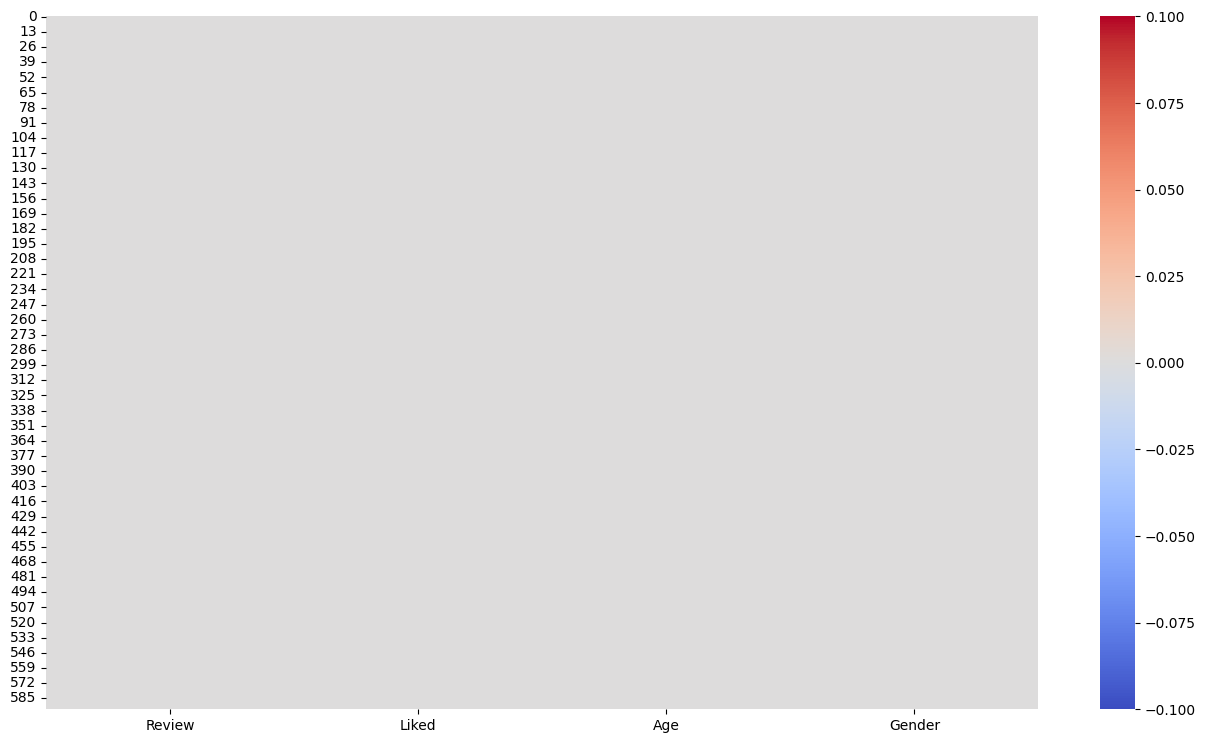

In [ ]:
# show the null values using the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(data=dataset.isnull(), cmap='coolwarm')
plt.show()

In [ ]:
# Removing Gender and Age Columns as we are depicting sentiment from the review only
dataset = dataset.drop(columns='Age')
dataset = dataset.drop(columns='Gender')
dataset.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


# Cleaning the texts

In [ ]:
# import the libraries
import re                                    # regular expressions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords            # import the downloaded stopwords
from nltk.stem.porter import PorterStemmer   # we will use PorterStemmer class to apply the stemming on reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = [] # this list will contain all the cleaned reviews from our dataset

for i in range(0,len(dataset)):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  all_stopwards = stopwords.words('english')
  all_stopwards.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwards)]
  review = ' '.join(review)
  #print(review)
  corpus.append(review)


In [ ]:
#Checking the cut words
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'fri great', 'servic prompt', 'would not go back', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'worst salmon sashimi', 'like final blow', 'found place accid could not happier', 'overal like place lot', 'ampl portion good price', 'first visit hiro delight', 'shrimp tender moist', 'thing like prime rib dessert section', 'bad food damn gener', 'burger good beef cook right', 'want sandwich go firehous', 'chow mein good', 'portion huge', 'not much seafood like string pasta bottom', 'place receiv star appet', 'cocktail handmad delici', 'definit go back', 'glad found place', 'alway great time do gringo'

In [ ]:
#checking length of the new reviews
len(corpus)

595

# Creating Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1500)

In [ ]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
x.shape

(595, 859)

In [ ]:
y.shape

(595,)

# Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Training Models

1) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier_nb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


print(results)

         Model  Accuracy  Precision    Recall  F1 Score
0  Naive Bayes  0.776536   0.869565  0.659341      0.75


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79  9]
 [31 60]]


2) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# create classifier and fit the model
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)




LogisticRegression(random_state=0)

In [ ]:
# make predictions on the test set
y_pred_lr = classifier_lr.predict(x_test)

# calculate performance metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# create a dataframe with the Logistic Regression results
results_lr = pd.DataFrame([['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# append the results to the Naive Bayes results dataframe
results = pd.concat([results, results_lr], ignore_index=True)
results = results.drop_duplicates()

# display the combined results dataframe
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.776536   0.869565  0.659341  0.750000
1  Logistic Regression  0.826816   0.840909  0.813187  0.826816


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)


[[74 14]
 [17 74]]


3) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Create SVM classifier with linear kernel
classifier_svm = SVC(kernel='linear', random_state=0)

# Fit classifier to training data
classifier_svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Make predictions on test data
y_pred = classifier_svm.predict(x_test)

# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create DataFrame to store model results
model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)
results = results.drop_duplicates()
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.776536   0.869565  0.659341  0.750000
1  Logistic Regression  0.826816   0.840909  0.813187  0.826816
2                  SVM  0.832402   0.858824  0.802198  0.829545


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[76 12]
 [18 73]]


##Model Comparison

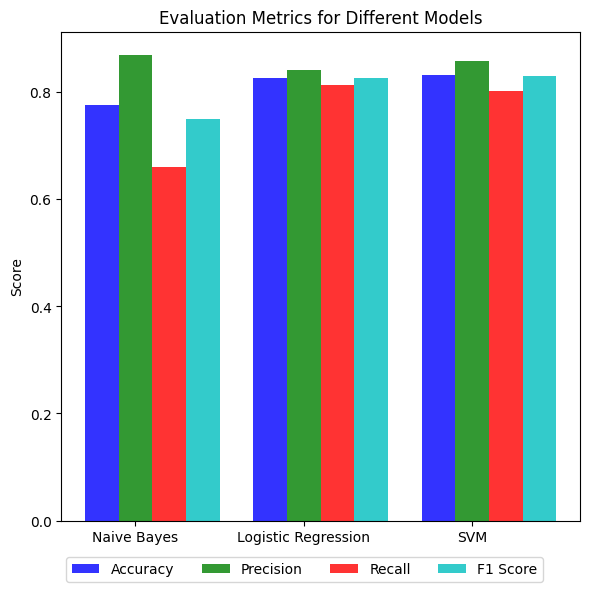

In [ ]:
import matplotlib.pyplot as plt

models = results['Model'].tolist()
accuracy = results['Accuracy'].tolist()
precision = results['Precision'].tolist()
recall = results['Recall'].tolist()
f1_score = results['F1 Score'].tolist()

fig, ax = plt.subplots(figsize=(6,6))
index = range(len(models))

bar_width = 0.2
opacity = 0.8

rects1 = ax.bar(index, accuracy, bar_width,
                 alpha=opacity, color='b',
                 label='Accuracy')

rects2 = ax.bar([i + bar_width for i in index], precision, bar_width,
                 alpha=opacity, color='g',
                 label='Precision')

rects3 = ax.bar([i + bar_width*2 for i in index], recall, bar_width,
                 alpha=opacity, color='r',
                 label='Recall')

rects4 = ax.bar([i + bar_width*3 for i in index], f1_score, bar_width,
                 alpha=opacity, color='c',
                 label='F1 Score')

ax.set_xticks([i + bar_width*1 for i in index])
ax.set_xticklabels(models)

ax.legend(loc='center', bbox_to_anchor=(0.469, -0.1), ncol=4)

ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics for Different Models')

plt.tight_layout()
plt.show()



# Testing single custom input review

In [ ]:
new_review = input()
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier_svm.predict(new_x_test)
print(new_y_pred)

not bad
[0]
